In [1]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [6]:
df = pd.read_csv("dataNew2.csv")
df['change'] = df['change'].str.extract(r'(([+-]?([0-9]*[.])?[0-9]+))').astype(float).replace(np.nan, 0.0)
df['change'] = np.sign(df['change'])
df = df.drop(["created",'ticker'], axis = 1)

#OHE
onehot_features = ['subreddit']
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False)
encoded = onehot.fit_transform(df[onehot_features])
encoded = pd.DataFrame(encoded)
df.drop(onehot_features, axis=1, inplace=True)
df = pd.concat([df, encoded], axis=1)
print(df)


# y = df["change"]
# X = df.drop("change", axis=1)
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
# print(X)
# ss = sklearn.preprocessing.StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.fit_transform(X_test)
# print(X_train)
# print(df['change'].isnull().values.any())

      score  num_comments  length  exclam points  ques marks  dollar signs  \
0         2             3    1142              0           2             1   
1         3             7    3369              0           0             2   
2         3             7    3369              0           0             2   
3         3             7    3369              0           0             2   
4         2            13    1675              2           9             3   
...     ...           ...     ...            ...         ...           ...   
4155    360            97    1933              0           1             0   
4156    360            97    1933              0           1             0   
4157    477           614    3497              5           9             1   
4158      0            57     513              0           2             0   
4159      0            57     513              0           2             0   

      percent signs  good words  bad words  change    0    1   

In [48]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
import seaborn as sns

In [72]:
sgd = sklearn.linear_model.SGDRegressor(penalty = 'elasticnet')
scores = sklearn.model_selection.cross_val_score(sgd, X, y, cv=5, scoring="neg_mean_absolute_error")
print("The average 5-fold cross-validation MAE is:", -np.mean(scores))

The average 5-fold cross-validation MAE is: 1.947786030170408e+16


The average 5-fold cross-validation MAE is: 1.2249756992723542e+16
The average 5-fold cross-validation MAE is: 2.3061612328056148e+16
The average 5-fold cross-validation MAE is: 1.284822050287703e+16


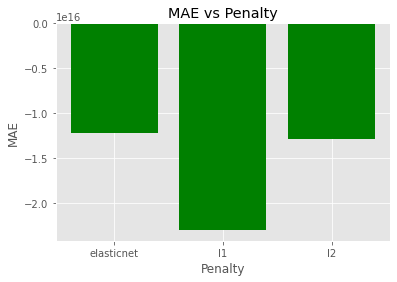

In [77]:
sgd1 = sklearn.linear_model.SGDRegressor(penalty = 'elasticnet')
scores1 = sklearn.model_selection.cross_val_score(sgd1, X, y, cv=5, scoring="neg_mean_absolute_error")
print("The average 5-fold cross-validation MAE is:", -np.mean(scores1))
sgd2 = sklearn.linear_model.SGDRegressor(penalty = 'l1')
scores2 = sklearn.model_selection.cross_val_score(sgd2, X, y, cv=5, scoring="neg_mean_absolute_error")
print("The average 5-fold cross-validation MAE is:", -np.mean(scores2))
sgd3 = sklearn.linear_model.SGDRegressor(penalty = 'l2')
scores3 = sklearn.model_selection.cross_val_score(sgd3, X, y, cv=5, scoring="neg_mean_absolute_error")
print("The average 5-fold cross-validation MAE is:", -np.mean(scores3))
%matplotlib inline
plt.style.use('ggplot')

x = ['elasticnet', 'l1', 'l2']
energy = [np.mean(scores1), np.mean(scores2), np.mean(scores3)]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Penalty")
plt.ylabel("MAE")
plt.title("MAE vs Penalty")

plt.xticks(x_pos, x)

plt.show()

In [78]:
bestneighbor = 0
lowestscore = 100
for i in range(5, 15) :
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i)
    scores = sklearn.model_selection.cross_val_score(knn, X, y, cv=5, scoring="neg_mean_absolute_error")
    print("The average 5-fold cross-validation MAE is:", -np.mean(scores))
    if np.mean(scores) < lowestscore :
        bestneighbor = i


The average 5-fold cross-validation MAE is: 6.89953928682061
The average 5-fold cross-validation MAE is: 6.719474620933593
The average 5-fold cross-validation MAE is: 6.700214648878619
The average 5-fold cross-validation MAE is: 6.590949875090146
The average 5-fold cross-validation MAE is: 6.55317358354406
The average 5-fold cross-validation MAE is: 6.452620147375702
The average 5-fold cross-validation MAE is: 6.395848186923426
The average 5-fold cross-validation MAE is: 6.478998491658288
The average 5-fold cross-validation MAE is: 6.292956175380188
The average 5-fold cross-validation MAE is: 6.406578734481213


In [18]:
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

prediction_knn = knn.predict(X_test)
print(prediction_knn)

[-0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -1.78486  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -3.852494 -0.28892  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -0.28892  -0.28892  -1.920966 -2.618798 -0.28892
 -0.28892  -0.28892  -0.729994 -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -3.852494 -1.78486  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -0.28892  -3.852494 -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892  -0.28892
 -0.28892  -1.78486 

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

grid_params = {
    'n_neighbors': [3,5,11,15],
    'weights': ['uniform','distance']
}

gs = GridSearchCV(
     KNeighborsRegressor(),
     grid_params,
     verbose = 1,
     cv=3,
     n_jobs=-1
) 
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_params_)
print(gs_results.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'n_neighbors': 15, 'weights': 'uniform'}
-0.04739143092455311


In [84]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)


# Plot the results
plt.figure()
plt.scatter(760, 760, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-4.692040e+00  4.052800e-01  1.312640e+00  3.416820e+00  5.660100e-01
 -3.974120e+00 -6.889900e+00 -2.664800e-01 -2.420660e+00 -2.554690e+00
 -4.659120e+00  1.647783e+01  5.319610e+00  9.387000e-01 -3.960400e-01
  3.993900e-01 -9.152000e-02 -5.792900e+00 -6.694200e-01 -1.476460e+00
 -6.394010e+00 -7.407410e+00 -2.836000e-01  2.369070e+00  4.541930e+00
 -2.439244e+01 -1.429590e+00  1.026560e+00 -3.845600e+00  1.887810e+01
 -3.265310e+00  4.128110e+00 -2.183000e-01 -6.853930e+00 -1.829790e+00
  6.559600e-01 -6.743300e-01 -5.368760e+00  0.000000e+00 -1.096008e+01
  3.532200e-01  0.000000e+00 -4.084400e-01 -8.050310e+00  8.018900e-01
  6.181840e+00  2.484820e+00  7.430400e-01 -4.069940e+01  0.000000e+00
 -3.293250e+00 -6.017700e+00  2.963830e+00  8.062010e+00  2.619510e+00
  1.242240e+00  7.092200e-01  4.996800e+00  5.464400e-01  1.079970e+00
 -1.929600e-01  7.787500e+00  1.585490e+00  1.721312e+01  0.000000e+00
  7.165070e+00 -1.616162e+01 -8.926080e+00 -1.694352e+01  1.395101e+01
 -6.018520e+00  4.433680e+00  6.062900e-01  5.089757e+01  2.533330e+00
  2.641600e-01  1.224490e+00  8.392560e+00 -2.514700e-01  8.000000e+02
  4.968950e+00  1.109590e+00 -5.693070e+00  1.333030e+00  5.651830e+00
 -9.291500e-01 -2.127700e+00  1.233200e-01  8.221000e-01  3.954800e-01
  9.340900e-01 -4.717000e-01 -4.946270e+00  2.789969e+01  9.633700e-01
  0.000000e+00 -2.343800e+00 -8.414000e-02  5.138340e+00 -7.358680e+00
 -7.738420e+00  2.061600e-01 -7.341770e+00  9.931100e-01 -1.340000e+01
 -4.815140e+00  7.772600e-01  7.672290e+00  2.473700e-01 -3.942650e+00
  1.495260e+00  1.088290e+00  4.986870e+00  9.637000e-02  5.299740e+00
  1.675000e+01  1.564970e+00  9.346000e-02 -1.484800e-01 -4.706660e+00
 -7.176090e+00  2.053840e+00  9.094800e-01  3.038180e+00 -8.287290e+00
 -1.447200e+00 -2.827004e+01  1.666666e+01  3.138390e+00  0.000000e+00
 -3.418050e+00 -2.102020e+00 -1.462060e+00  0.000000e+00  0.000000e+00
  2.761980e+00  0.000000e+00 -1.633730e+00  5.128200e+00 -8.905900e-01
 -6.340500e+00  3.414600e-01 -3.446200e-01 -3.792700e-01  3.209940e+00
 -1.927083e+01 -4.529210e+00 -4.826860e+00  8.322030e+00  3.222620e+00
 -8.254100e-01 -1.587000e-02  8.973300e-01  2.086600e+00  3.374770e+00
  5.634100e-01  5.138340e+00  1.762840e+00 -9.295350e+00  2.349480e+00
 -8.917470e+00  3.307690e+00  8.456670e+00  1.552770e+00  3.008700e+00
 -1.700448e+01  2.034260e+00 -5.000000e+00  5.641020e+00  1.449270e+00
  1.292230e+00  2.780740e+00  2.471220e+00 -6.476390e+00  1.232320e+00
  8.158200e-01 -8.687020e+00 -9.787620e+00  1.811414e+01  2.763820e+00
 -8.729000e-02  0.000000e+00  4.375000e+00  1.088620e+00  1.959760e+00
  9.137800e-01  8.603500e-01  1.577290e+00  1.043460e+00  1.242240e+00
  2.000000e+00  1.386580e+00 -1.191322e+01 -3.668330e+00  3.932585e+01
 -7.602000e-02  0.000000e+00 -2.836096e+01 -2.572030e+00  2.007580e+00
  2.083330e+00  1.884270e+00  3.652338e+01  1.861910e+00 -2.640160e+00
 -4.994400e-01  1.572330e+00  1.719750e+00 -5.972100e-01 -4.254690e+00
 -7.738600e-01 -8.791900e-01  9.566520e+00 -4.836600e-01  9.154540e+00
 -1.467890e+01 -5.150000e-02 -6.807600e-01 -1.100320e+00 -4.306758e+01
 -4.747475e+01  2.257340e+00  1.092500e+00  1.205790e+00 -3.130194e+01
  4.921050e+00 -1.690860e+00  1.245930e+00  6.207600e-01 -6.717500e-01
  2.358170e+00 -1.161400e-01  0.000000e+00 -8.145750e+00  1.567580e+00
  2.238150e+00 -1.832200e-01  1.142670e+00 -3.150140e+00 -6.188100e-01
 -1.955696e+01  1.579320e+00 -5.631120e+00 -5.150000e-02  0.000000e+00
 -2.519640e+00  4.214100e-01 -3.796080e+00 -5.692770e+00  3.061200e-01
  2.540800e-01  3.122020e+00 -1.579150e+00 -4.680850e+00  1.256800e-01
 -7.835640e+00  5.485230e+00  1.146533e+01  3.613180e+00  1.351400e-01
  2.530760e+00 -3.535360e+00 -8.145750e+00 -6.094420e+00  4.465670e+00
 -3.289470e+00 -5.307750e+00  1.936270e+00 -1.606420e+00 -1.408046e+01
  3.050770e+00 -1.462060e+00  6.811200e-01 -8.092490e+00 -6.656890e+00
 -8.340970e+00 -6.130260e+00  7.556700e-01  3.698890e+00  1.324451e+01
 -1.405900e-01  1.157350e+00  1.672617e+01  5.096140e+00 -4.692040e+00
 -8.323400e-01 -2.423979e+01  3.347000e-02  7.738400e-01  1.925191e+01
 -1.257683e+01 -3.622990e+00  1.666666e+01 -1.202864e+01  8.223680e+00
 -3.278690e+00  4.434080e+00  2.752300e-01 -4.283270e+00  2.149180e+00
  8.567900e-01 -5.334730e+00  8.705200e-01 -3.121920e+00  4.262370e+00
  4.449400e-01  3.267490e+00 -6.438520e+00 -8.059700e+00  2.691800e-01
 -3.339100e-01 -6.853930e+00  1.034078e+01 -5.157600e+00  9.589200e-01
  1.174880e+00 -1.265993e+01  4.449400e-01 -2.836000e-01  3.169800e+00
  7.929420e+00  2.038490e+00  1.897435e+01  3.312750e+00  1.849300e-01
 -1.549776e+01 -5.701190e+00  1.824500e+00  9.874300e-01 -5.426990e+00
  3.555000e-02  1.322871e+01 -6.354200e-01  4.121210e+00 -7.698800e-01
  2.450635e+01 -2.933210e+00  2.367300e+00  6.846000e-01  4.031000e-01
 -1.435079e+01 -1.358700e-01  2.022280e+00 -2.220361e+01 -2.849000e-01
  3.125400e-01  1.437550e+00 -5.507700e+00  1.815820e+00  2.043160e+00
 -7.024700e-01 -2.392990e+00  2.170010e+00 -4.946270e+00  4.123400e-01
  1.846240e+00  7.260730e+00  1.492540e+00  5.158600e-01 -1.079208e+01
  1.395090e+00  2.042710e+00 -1.404140e+01  2.152318e+01 -7.201200e-01
  2.103540e+00 -2.280040e+00  9.007600e-01  1.974600e-01 -8.645070e+00
  5.377160e+00 -2.280040e+00  0.000000e+00 -4.224060e+00 -2.046990e+00
 -2.628440e+00 -6.827790e+00  1.192452e+01 -8.352940e+00 -1.958760e+00
  0.000000e+00  2.257340e+00  7.210900e-01  2.594140e+00  1.157350e+00
 -8.425070e+00 -4.479290e+00  1.114940e+00 -8.817760e+00 -2.517720e+00
 -4.542560e+00  4.687320e+00 -8.581000e-02  0.000000e+00  5.337160e+00
  0.000000e+00  4.942630e+00 -5.150000e-02  1.593940e+00  6.954360e+00
  1.320755e+01 -4.019690e+00 -5.078540e+00  6.100800e+00  3.069580e+00
 -4.295530e+00  3.658540e+00  3.959500e-01 -1.082900e-01 -4.761900e+00
  8.114800e-01  1.781000e-01  9.605200e-01 -1.971354e+01 -2.628044e+01
  1.209490e+00  9.256500e-01  7.283670e+00 -1.628450e+00  6.009030e+00
  1.622720e+00  0.000000e+00 -1.445900e-01 -2.150820e+00 -1.936860e+00
 -5.461440e+00  8.062420e+00  1.076924e+01  1.554071e+01  3.374770e+00
 -1.158000e-02  2.493220e+00 -4.000000e+00 -1.228513e+01  1.233200e-01
  5.017980e+00 -5.106800e-01 -6.394010e+00 -1.205740e+00  7.344630e+00
  3.244420e+00  2.400300e-01  0.000000e+00  3.294120e+00 -9.743100e-01
 -5.331180e+00  1.007490e+00  5.035900e-01  1.997780e+00 -2.292062e+01
  7.010310e+00  9.566230e+00  4.532000e-02 -1.810470e+00  1.182236e+01
  2.173910e+00  8.062010e+00  2.488690e+00 -1.570250e+00 -7.117500e-01
  1.686311e+01 -7.391810e+00 -4.059690e+00  1.713170e+00 -4.301410e+00
 -5.469593e+01 -1.099158e+01 -2.381000e-02  6.525570e+00 -1.523240e+00
  7.270300e-01 -3.946110e+00 -7.391810e+00 -9.906670e+00 -3.481620e+00
  5.334090e+00 -1.232510e+00  1.647783e+01 -6.600500e-01 -4.961400e-01
 -1.170440e+00 -1.626330e+00  4.490402e+01  2.636810e+00 -4.862700e+00
  1.888619e+01  7.070000e-03 -2.306080e+00 -6.167400e+00  3.060310e+00
  4.513880e+00 -9.470310e+00  1.435234e+01 -4.441000e-01 -1.000590e+00
 -7.394690e+00  3.574770e+00 -5.025100e-01 -6.094420e+00  2.106670e+00
  8.014500e-01  0.000000e+00  4.120667e+01  9.128070e+00 -6.296300e+00
  4.689900e-01 -9.400700e-01  1.461794e+01  3.125000e+00 -9.893050e+00
 -2.210890e+00 -6.739800e-01  1.143008e+01 -1.759259e+01 -5.074140e+00
  1.933404e+01 -1.105600e+00 -1.569650e+00  8.108100e-01 -7.920790e+00
  1.117840e+01  8.073700e-01 -1.085130e+00  1.674790e+00 -3.150140e+00
  3.149250e+00 -3.823980e+00 -3.055620e+00 -1.099505e+01 -2.652030e+00
  9.833000e-02  6.308410e+00  5.763700e-01  1.672240e+00  5.995620e+00
  1.571195e+01 -2.520950e+00 -8.592000e-02  6.767500e-01  6.034500e-01
  1.649310e+00  1.710000e-01 -4.920000e+00  0.000000e+00  0.000000e+00
 -4.378530e+00  2.456350e+00  6.005400e-01  3.484370e+00  7.611260e+00
 -8.364320e+00 -7.939640e+00 -2.097902e+01  1.332790e+00  1.691100e-01
  7.203200e-01 -6.666600e-01  3.050770e+00  5.952690e+00  1.929060e+00
  3.262990e+00  6.107400e-01 -7.815040e+00 -2.409620e+01 -1.888889e+01
  3.026170e+00  1.378460e+00  6.306800e-01 -3.222222e+01 -6.652210e+00
  5.098000e-01 -2.210890e+00 -9.613800e-01 -1.161570e+00  5.354060e+00
 -1.203587e+01  0.000000e+00  5.835500e-01 -4.059690e+00 -7.394690e+00
 -4.278080e+00  1.799200e-01 -1.651120e+00 -3.979850e+00 -5.398560e+00
  5.739690e+00  2.867070e+00  1.158100e+00  1.334700e+00 -7.027140e+00
  3.942350e+00 -1.789890e+00  1.109740e+00 -2.375810e+00  3.182180e+00
 -8.785250e+00  9.807900e-01 -3.061200e-01 -3.979850e+00  1.732990e+00
  0.000000e+00 -1.227450e+00  1.990280e+00 -6.684500e-01  2.352460e+00
  5.119400e-01  4.074300e+00  9.731000e-02  8.054290e+00  2.163820e+00
  4.743490e+00  8.890930e+00 -6.020700e+00 -6.984590e+00  2.000000e+00
 -1.816100e-01  0.000000e+00  0.000000e+00  1.692460e+00 -8.374090e+00
  1.990280e+00  6.296296e+01 -3.300090e+00 -1.106330e+00  1.140830e+00
  0.000000e+00  8.007660e+00 -1.725960e+00 -1.975309e+01 -3.873930e+00
  6.814200e-01 -2.413800e+00  1.041463e+01 -5.102000e-01  6.801550e+00
  3.038180e+00  1.819900e+00  2.649000e+00  1.173860e+00  2.736320e+00
  4.800700e-01  0.000000e+00 -1.705270e+00  4.440150e+00 -1.162790e+00
 -1.010950e+00  3.209940e+00 -1.111112e+01  9.133710e+00  2.839700e-01
  6.985100e-01  0.000000e+00  5.660100e-01  3.341070e+00  5.505560e+00
 -5.469700e-01  9.272200e-01 -1.358025e+01 -1.449706e+01  3.555570e+00
  9.137800e-01  1.855170e+00 -6.297510e+00 -1.600272e+01  1.086610e+00
  1.332790e+00  9.491000e-02  2.253760e+00 -6.980470e+00 -7.391810e+00
  2.780190e+00  4.274270e+00  7.162040e+00 -5.403980e+00  0.000000e+00
 -3.228400e-01  2.185400e-01 -9.125100e-01 -1.874120e+00 -1.356839e+01
 -1.449706e+01 -5.160720e+00 -6.426580e+00  3.454545e+01 -4.285710e+00
 -2.020040e+00  3.268510e+00 -2.122510e+00 -2.143680e+00  4.690300e-01
 -2.820510e+00  2.415470e+00  3.882790e+00 -1.212940e+00  1.926440e+00
 -6.666600e-01 -1.108030e+00 -8.712290e+00  1.464967e+01  9.420300e+00
  2.711900e-01  5.596800e-01  2.072300e+00 -9.013700e-01  1.172130e+00
 -5.857080e+00  0.000000e+00 -1.701970e+01 -3.667900e+00  8.632000e-01
  0.000000e+00  5.122000e-02 -7.394690e+00  1.703250e+00  0.000000e+00
  1.073752e+01  1.345290e+00 -2.643400e-01  5.660100e-01  1.540900e-01
  5.208870e+00 -1.694352e+01 -5.197000e-02  2.192670e+00 -3.564500e-01
 -1.250000e+00 -2.249570e+00  5.905850e+00  5.592000e-02  5.970610e+00
  1.836649e+01 -2.298850e+00  2.212110e+00 -2.057000e-02  1.860380e+00
  8.536000e-01 -8.898100e-01  0.000000e+00  1.237171e+01 -7.883820e+00
  3.859650e+00 -3.285060e+00  3.483040e+00  2.481390e+00 -9.632600e-01
  2.115540e+00  1.784020e+00 -1.570645e+01 -4.192900e-01  9.123400e-01
 -3.069310e+00  1.348310e+00 -2.280040e+00  5.540300e-01  2.053840e+00
 -1.795202e+01  0.000000e+00  7.427900e-01  3.959500e-01 -2.078520e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:

from sklearn.model_selection import GridSearchCV

df = pd.read_csv("data.csv")
df['change'] = df['change'].str.extract(r'(([+-]?([0-9]*[.])?[0-9]+))').astype(float).replace(np.nan, 0.0)
df = df.drop(["created",'ticker'], axis = 1)

#OHE
onehot_features = ['subreddit']
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False)
encoded = onehot.fit_transform(df[onehot_features])
encoded = pd.DataFrame(encoded)
df.drop(onehot_features, axis=1, inplace=True)
df = pd.concat([df, encoded], axis=1)


y = df["change"]
X = df.drop("change", axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
print(X)
ss = sklearn.preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)

k = 5

# Hyperparameters to tune:
params = {
    'criterion': ('mse', 'friedman_mse', 'mae', 'poisson'),
    'max_depth': (5, 10, 20),
    'min_samples_split': (2, 5, 10)
}

#print(svm.SVC().get_params().keys())
print("starting grid search...")
# Initialize GridSearchCV object with decision tree classifier and hyperparameters
grid_tree = GridSearchCV(estimator=DecisionTreeRegressor(),
                         param_grid=params,
                         cv=k,
                         return_train_score=True,
                         scoring=['neg_mean_absolute_error'],
                         refit='neg_mean_absolute_error') 

print("finished grid search")
print("training...")
# Train
grid_tree.fit(X_train, y_train.values.ravel())
print("trained")
best_tree = grid_tree.best_estimator_

X_train = pd.DataFrame(X_train)

pd.Series(best_tree.feature_importances_, X_train.columns).sort_values(ascending=False)

#decisiontree = pd.DataFrame(decisiontree.cv_results_).sort_values(by=['neg_mean_absolute_error'], ascending=False)

#decisiontree[['param_multiclass', 'param_kernel', 'param_cs', 'neg_mean_absolute_error']]
#best_hyperparams = grid_tree.best_params_

#best_estimator = decisiontree.best_estimator_
# print best hyperparameters

# Resuts {'criterion': 'mae', 'max_depth': 5, 'min_samples_split': 2}


      score  num_comments  length  exclam points  ques marks  dollar signs  \
0         0             5     809              0           0             2   
1         0             5     809              0           0             2   
2       132            66     471              0           0             3   
3        12             4    1134              0           0            11   
4        12             4    1134              0           0            11   
...     ...           ...     ...            ...         ...           ...   
3793     71            80    4404              0           0            13   
3794     71            80    4404              0           0            13   
3795   9180           715     760              0           0             0   
3796      2             9    3913              0           0             0   
3797     48            65     576              0           0             0   

      percent signs  good words  bad words    0    1    2    3 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 168, in fit
    raise ValueError("Some value(s) of y are negative which is"
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Librar

trained


5     4.223531e-01
6     1.645929e-01
10    1.118716e-01
12    8.215104e-02
7     7.502343e-02
3     6.889942e-02
2     6.138199e-02
0     1.372653e-02
4     0.000000e+00
8     0.000000e+00
9     0.000000e+00
11    0.000000e+00
13    0.000000e+00
1    -3.958415e-17
dtype: float64

In [12]:
X_train = pd.DataFrame(X_train, columns = ['score', 'num_comments', 'length',  'exclam points', 'ques marks', 'dollar signs', 'percent signs', 'good words', 'bad words', '0', '1', '2', '3', '4'])

pd.Series(best_tree.feature_importances_, X_train.columns).sort_values(ascending=False)

dollar signs     0.302190
good words       0.190177
3                0.161515
length           0.151150
percent signs    0.086230
score            0.043320
num_comments     0.034334
1                0.025040
bad words        0.006046
exclam points    0.000000
ques marks       0.000000
0                0.000000
2                0.000000
4                0.000000
dtype: float64

In [38]:
decisiontree = DecisionTreeRegressor(criterion = 'mae', max_depth = 5, min_samples_split = 2)
decisiontree.fit(X_train, y_train)
tree_prediction = decisiontree.predict(X_test)
#print(tree_prediction)
print(decisiontree.score(y_test, tree_prediction, sample_weight=None))

ValueError: Expected 2D array, got 1D array instead:
array=[-4.692040e+00  4.052800e-01  1.312640e+00  3.416820e+00  5.660100e-01
 -3.974120e+00 -6.889900e+00 -2.664800e-01 -2.420660e+00 -2.554690e+00
 -4.659120e+00  1.647783e+01  5.319610e+00  9.387000e-01 -3.960400e-01
  3.993900e-01 -9.152000e-02 -5.792900e+00 -6.694200e-01 -1.476460e+00
 -6.394010e+00 -7.407410e+00 -2.836000e-01  2.369070e+00  4.541930e+00
 -2.439244e+01 -1.429590e+00  1.026560e+00 -3.845600e+00  1.887810e+01
 -3.265310e+00  4.128110e+00 -2.183000e-01 -6.853930e+00 -1.829790e+00
  6.559600e-01 -6.743300e-01 -5.368760e+00  0.000000e+00 -1.096008e+01
  3.532200e-01  0.000000e+00 -4.084400e-01 -8.050310e+00  8.018900e-01
  6.181840e+00  2.484820e+00  7.430400e-01 -4.069940e+01  0.000000e+00
 -3.293250e+00 -6.017700e+00  2.963830e+00  8.062010e+00  2.619510e+00
  1.242240e+00  7.092200e-01  4.996800e+00  5.464400e-01  1.079970e+00
 -1.929600e-01  7.787500e+00  1.585490e+00  1.721312e+01  0.000000e+00
  7.165070e+00 -1.616162e+01 -8.926080e+00 -1.694352e+01  1.395101e+01
 -6.018520e+00  4.433680e+00  6.062900e-01  5.089757e+01  2.533330e+00
  2.641600e-01  1.224490e+00  8.392560e+00 -2.514700e-01  8.000000e+02
  4.968950e+00  1.109590e+00 -5.693070e+00  1.333030e+00  5.651830e+00
 -9.291500e-01 -2.127700e+00  1.233200e-01  8.221000e-01  3.954800e-01
  9.340900e-01 -4.717000e-01 -4.946270e+00  2.789969e+01  9.633700e-01
  0.000000e+00 -2.343800e+00 -8.414000e-02  5.138340e+00 -7.358680e+00
 -7.738420e+00  2.061600e-01 -7.341770e+00  9.931100e-01 -1.340000e+01
 -4.815140e+00  7.772600e-01  7.672290e+00  2.473700e-01 -3.942650e+00
  1.495260e+00  1.088290e+00  4.986870e+00  9.637000e-02  5.299740e+00
  1.675000e+01  1.564970e+00  9.346000e-02 -1.484800e-01 -4.706660e+00
 -7.176090e+00  2.053840e+00  9.094800e-01  3.038180e+00 -8.287290e+00
 -1.447200e+00 -2.827004e+01  1.666666e+01  3.138390e+00  0.000000e+00
 -3.418050e+00 -2.102020e+00 -1.462060e+00  0.000000e+00  0.000000e+00
  2.761980e+00  0.000000e+00 -1.633730e+00  5.128200e+00 -8.905900e-01
 -6.340500e+00  3.414600e-01 -3.446200e-01 -3.792700e-01  3.209940e+00
 -1.927083e+01 -4.529210e+00 -4.826860e+00  8.322030e+00  3.222620e+00
 -8.254100e-01 -1.587000e-02  8.973300e-01  2.086600e+00  3.374770e+00
  5.634100e-01  5.138340e+00  1.762840e+00 -9.295350e+00  2.349480e+00
 -8.917470e+00  3.307690e+00  8.456670e+00  1.552770e+00  3.008700e+00
 -1.700448e+01  2.034260e+00 -5.000000e+00  5.641020e+00  1.449270e+00
  1.292230e+00  2.780740e+00  2.471220e+00 -6.476390e+00  1.232320e+00
  8.158200e-01 -8.687020e+00 -9.787620e+00  1.811414e+01  2.763820e+00
 -8.729000e-02  0.000000e+00  4.375000e+00  1.088620e+00  1.959760e+00
  9.137800e-01  8.603500e-01  1.577290e+00  1.043460e+00  1.242240e+00
  2.000000e+00  1.386580e+00 -1.191322e+01 -3.668330e+00  3.932585e+01
 -7.602000e-02  0.000000e+00 -2.836096e+01 -2.572030e+00  2.007580e+00
  2.083330e+00  1.884270e+00  3.652338e+01  1.861910e+00 -2.640160e+00
 -4.994400e-01  1.572330e+00  1.719750e+00 -5.972100e-01 -4.254690e+00
 -7.738600e-01 -8.791900e-01  9.566520e+00 -4.836600e-01  9.154540e+00
 -1.467890e+01 -5.150000e-02 -6.807600e-01 -1.100320e+00 -4.306758e+01
 -4.747475e+01  2.257340e+00  1.092500e+00  1.205790e+00 -3.130194e+01
  4.921050e+00 -1.690860e+00  1.245930e+00  6.207600e-01 -6.717500e-01
  2.358170e+00 -1.161400e-01  0.000000e+00 -8.145750e+00  1.567580e+00
  2.238150e+00 -1.832200e-01  1.142670e+00 -3.150140e+00 -6.188100e-01
 -1.955696e+01  1.579320e+00 -5.631120e+00 -5.150000e-02  0.000000e+00
 -2.519640e+00  4.214100e-01 -3.796080e+00 -5.692770e+00  3.061200e-01
  2.540800e-01  3.122020e+00 -1.579150e+00 -4.680850e+00  1.256800e-01
 -7.835640e+00  5.485230e+00  1.146533e+01  3.613180e+00  1.351400e-01
  2.530760e+00 -3.535360e+00 -8.145750e+00 -6.094420e+00  4.465670e+00
 -3.289470e+00 -5.307750e+00  1.936270e+00 -1.606420e+00 -1.408046e+01
  3.050770e+00 -1.462060e+00  6.811200e-01 -8.092490e+00 -6.656890e+00
 -8.340970e+00 -6.130260e+00  7.556700e-01  3.698890e+00  1.324451e+01
 -1.405900e-01  1.157350e+00  1.672617e+01  5.096140e+00 -4.692040e+00
 -8.323400e-01 -2.423979e+01  3.347000e-02  7.738400e-01  1.925191e+01
 -1.257683e+01 -3.622990e+00  1.666666e+01 -1.202864e+01  8.223680e+00
 -3.278690e+00  4.434080e+00  2.752300e-01 -4.283270e+00  2.149180e+00
  8.567900e-01 -5.334730e+00  8.705200e-01 -3.121920e+00  4.262370e+00
  4.449400e-01  3.267490e+00 -6.438520e+00 -8.059700e+00  2.691800e-01
 -3.339100e-01 -6.853930e+00  1.034078e+01 -5.157600e+00  9.589200e-01
  1.174880e+00 -1.265993e+01  4.449400e-01 -2.836000e-01  3.169800e+00
  7.929420e+00  2.038490e+00  1.897435e+01  3.312750e+00  1.849300e-01
 -1.549776e+01 -5.701190e+00  1.824500e+00  9.874300e-01 -5.426990e+00
  3.555000e-02  1.322871e+01 -6.354200e-01  4.121210e+00 -7.698800e-01
  2.450635e+01 -2.933210e+00  2.367300e+00  6.846000e-01  4.031000e-01
 -1.435079e+01 -1.358700e-01  2.022280e+00 -2.220361e+01 -2.849000e-01
  3.125400e-01  1.437550e+00 -5.507700e+00  1.815820e+00  2.043160e+00
 -7.024700e-01 -2.392990e+00  2.170010e+00 -4.946270e+00  4.123400e-01
  1.846240e+00  7.260730e+00  1.492540e+00  5.158600e-01 -1.079208e+01
  1.395090e+00  2.042710e+00 -1.404140e+01  2.152318e+01 -7.201200e-01
  2.103540e+00 -2.280040e+00  9.007600e-01  1.974600e-01 -8.645070e+00
  5.377160e+00 -2.280040e+00  0.000000e+00 -4.224060e+00 -2.046990e+00
 -2.628440e+00 -6.827790e+00  1.192452e+01 -8.352940e+00 -1.958760e+00
  0.000000e+00  2.257340e+00  7.210900e-01  2.594140e+00  1.157350e+00
 -8.425070e+00 -4.479290e+00  1.114940e+00 -8.817760e+00 -2.517720e+00
 -4.542560e+00  4.687320e+00 -8.581000e-02  0.000000e+00  5.337160e+00
  0.000000e+00  4.942630e+00 -5.150000e-02  1.593940e+00  6.954360e+00
  1.320755e+01 -4.019690e+00 -5.078540e+00  6.100800e+00  3.069580e+00
 -4.295530e+00  3.658540e+00  3.959500e-01 -1.082900e-01 -4.761900e+00
  8.114800e-01  1.781000e-01  9.605200e-01 -1.971354e+01 -2.628044e+01
  1.209490e+00  9.256500e-01  7.283670e+00 -1.628450e+00  6.009030e+00
  1.622720e+00  0.000000e+00 -1.445900e-01 -2.150820e+00 -1.936860e+00
 -5.461440e+00  8.062420e+00  1.076924e+01  1.554071e+01  3.374770e+00
 -1.158000e-02  2.493220e+00 -4.000000e+00 -1.228513e+01  1.233200e-01
  5.017980e+00 -5.106800e-01 -6.394010e+00 -1.205740e+00  7.344630e+00
  3.244420e+00  2.400300e-01  0.000000e+00  3.294120e+00 -9.743100e-01
 -5.331180e+00  1.007490e+00  5.035900e-01  1.997780e+00 -2.292062e+01
  7.010310e+00  9.566230e+00  4.532000e-02 -1.810470e+00  1.182236e+01
  2.173910e+00  8.062010e+00  2.488690e+00 -1.570250e+00 -7.117500e-01
  1.686311e+01 -7.391810e+00 -4.059690e+00  1.713170e+00 -4.301410e+00
 -5.469593e+01 -1.099158e+01 -2.381000e-02  6.525570e+00 -1.523240e+00
  7.270300e-01 -3.946110e+00 -7.391810e+00 -9.906670e+00 -3.481620e+00
  5.334090e+00 -1.232510e+00  1.647783e+01 -6.600500e-01 -4.961400e-01
 -1.170440e+00 -1.626330e+00  4.490402e+01  2.636810e+00 -4.862700e+00
  1.888619e+01  7.070000e-03 -2.306080e+00 -6.167400e+00  3.060310e+00
  4.513880e+00 -9.470310e+00  1.435234e+01 -4.441000e-01 -1.000590e+00
 -7.394690e+00  3.574770e+00 -5.025100e-01 -6.094420e+00  2.106670e+00
  8.014500e-01  0.000000e+00  4.120667e+01  9.128070e+00 -6.296300e+00
  4.689900e-01 -9.400700e-01  1.461794e+01  3.125000e+00 -9.893050e+00
 -2.210890e+00 -6.739800e-01  1.143008e+01 -1.759259e+01 -5.074140e+00
  1.933404e+01 -1.105600e+00 -1.569650e+00  8.108100e-01 -7.920790e+00
  1.117840e+01  8.073700e-01 -1.085130e+00  1.674790e+00 -3.150140e+00
  3.149250e+00 -3.823980e+00 -3.055620e+00 -1.099505e+01 -2.652030e+00
  9.833000e-02  6.308410e+00  5.763700e-01  1.672240e+00  5.995620e+00
  1.571195e+01 -2.520950e+00 -8.592000e-02  6.767500e-01  6.034500e-01
  1.649310e+00  1.710000e-01 -4.920000e+00  0.000000e+00  0.000000e+00
 -4.378530e+00  2.456350e+00  6.005400e-01  3.484370e+00  7.611260e+00
 -8.364320e+00 -7.939640e+00 -2.097902e+01  1.332790e+00  1.691100e-01
  7.203200e-01 -6.666600e-01  3.050770e+00  5.952690e+00  1.929060e+00
  3.262990e+00  6.107400e-01 -7.815040e+00 -2.409620e+01 -1.888889e+01
  3.026170e+00  1.378460e+00  6.306800e-01 -3.222222e+01 -6.652210e+00
  5.098000e-01 -2.210890e+00 -9.613800e-01 -1.161570e+00  5.354060e+00
 -1.203587e+01  0.000000e+00  5.835500e-01 -4.059690e+00 -7.394690e+00
 -4.278080e+00  1.799200e-01 -1.651120e+00 -3.979850e+00 -5.398560e+00
  5.739690e+00  2.867070e+00  1.158100e+00  1.334700e+00 -7.027140e+00
  3.942350e+00 -1.789890e+00  1.109740e+00 -2.375810e+00  3.182180e+00
 -8.785250e+00  9.807900e-01 -3.061200e-01 -3.979850e+00  1.732990e+00
  0.000000e+00 -1.227450e+00  1.990280e+00 -6.684500e-01  2.352460e+00
  5.119400e-01  4.074300e+00  9.731000e-02  8.054290e+00  2.163820e+00
  4.743490e+00  8.890930e+00 -6.020700e+00 -6.984590e+00  2.000000e+00
 -1.816100e-01  0.000000e+00  0.000000e+00  1.692460e+00 -8.374090e+00
  1.990280e+00  6.296296e+01 -3.300090e+00 -1.106330e+00  1.140830e+00
  0.000000e+00  8.007660e+00 -1.725960e+00 -1.975309e+01 -3.873930e+00
  6.814200e-01 -2.413800e+00  1.041463e+01 -5.102000e-01  6.801550e+00
  3.038180e+00  1.819900e+00  2.649000e+00  1.173860e+00  2.736320e+00
  4.800700e-01  0.000000e+00 -1.705270e+00  4.440150e+00 -1.162790e+00
 -1.010950e+00  3.209940e+00 -1.111112e+01  9.133710e+00  2.839700e-01
  6.985100e-01  0.000000e+00  5.660100e-01  3.341070e+00  5.505560e+00
 -5.469700e-01  9.272200e-01 -1.358025e+01 -1.449706e+01  3.555570e+00
  9.137800e-01  1.855170e+00 -6.297510e+00 -1.600272e+01  1.086610e+00
  1.332790e+00  9.491000e-02  2.253760e+00 -6.980470e+00 -7.391810e+00
  2.780190e+00  4.274270e+00  7.162040e+00 -5.403980e+00  0.000000e+00
 -3.228400e-01  2.185400e-01 -9.125100e-01 -1.874120e+00 -1.356839e+01
 -1.449706e+01 -5.160720e+00 -6.426580e+00  3.454545e+01 -4.285710e+00
 -2.020040e+00  3.268510e+00 -2.122510e+00 -2.143680e+00  4.690300e-01
 -2.820510e+00  2.415470e+00  3.882790e+00 -1.212940e+00  1.926440e+00
 -6.666600e-01 -1.108030e+00 -8.712290e+00  1.464967e+01  9.420300e+00
  2.711900e-01  5.596800e-01  2.072300e+00 -9.013700e-01  1.172130e+00
 -5.857080e+00  0.000000e+00 -1.701970e+01 -3.667900e+00  8.632000e-01
  0.000000e+00  5.122000e-02 -7.394690e+00  1.703250e+00  0.000000e+00
  1.073752e+01  1.345290e+00 -2.643400e-01  5.660100e-01  1.540900e-01
  5.208870e+00 -1.694352e+01 -5.197000e-02  2.192670e+00 -3.564500e-01
 -1.250000e+00 -2.249570e+00  5.905850e+00  5.592000e-02  5.970610e+00
  1.836649e+01 -2.298850e+00  2.212110e+00 -2.057000e-02  1.860380e+00
  8.536000e-01 -8.898100e-01  0.000000e+00  1.237171e+01 -7.883820e+00
  3.859650e+00 -3.285060e+00  3.483040e+00  2.481390e+00 -9.632600e-01
  2.115540e+00  1.784020e+00 -1.570645e+01 -4.192900e-01  9.123400e-01
 -3.069310e+00  1.348310e+00 -2.280040e+00  5.540300e-01  2.053840e+00
 -1.795202e+01  0.000000e+00  7.427900e-01  3.959500e-01 -2.078520e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [28]:
#svr = sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)[source]¶
k = 5

# Hyperparameters to tune:
params = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed'),
    'c': ('1', '2')
}

#print(svm.SVC().get_params().keys())
print("starting grid search...")
# Initialize GridSearchCV object with decision tree classifier and hyperparameters
grid = GridSearchCV(estimator=sklearn.svm.SVR(),
                         param_grid=params,
                         cv=k,
                         return_train_score=True,
                         scoring=['neg_mean_absolute_error'],
                         refit='neg_mean_absolute_error') 

print("finished grid search")
print("training...")
# Train
X_train = pd.DataFrame(X_train)
grid.fit(X_train, y_train)
print("trained")
best_tree = grid_tree.best_estimator_



pd.Series(best_tree.feature_importances_, X_train.columns).sort_values(ascending=False)

decisiontree = pd.DataFrame(decisiontree.cv_results_).sort_values(by=['neg_mean_absolute_error'], ascending=False)

#decisiontree[['param_multiclass', 'param_kernel', 'param_cs', 'neg_mean_absolute_error']]
best_hyperparams = grid.best_params_

#best_estimator = decisiontree.best_estimator_
print(best_hyperpars)

starting grid search...
finished grid search
training...


ValueError: X should be a square kernel matrix

In [3]:
import itertools
df = pd.read_csv("dataNew6.csv")
df['change'] = df['change'].str.extract(r'(([+-]?([0-9]*[.])?[0-9]+))').astype(float).replace(np.nan, 0.0)
#df['change'] = np.sign(df['change'])
df = df.drop(["created",'ticker'], axis = 1)

#OHE
onehot_features = ['subreddit']
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False)
encoded = onehot.fit_transform(df[onehot_features])
encoded = pd.DataFrame(encoded)
df.drop(onehot_features, axis=1, inplace=True)
df = pd.concat([df, encoded], axis=1)


y = df["change"]
X = df.drop("change", axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
#print(X)
ss = sklearn.preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

#multiclass = ["ovo", "ovr"]
#kernel = ["linear", "poly", "rbf", "sigmoid"] # if kernel is "polynomial", we'll use the default degree of 3 (cubic)
#cs = [1, 10]

#results = pd.DataFrame()

#for m, k, c in itertools.product(multiclass, kernel, cs):
    
#    print(m, k, c)
    # create model
#    clf = sklearn.svm.SVC(C=c, kernel=k, decision_function_shape=m) 
    
    # train model and compute 5-fold cross_validation accuracy
#    accuracies = sklearn.model_selection.cross_val_score(clf, X_train, y_train) 
#    avg_accuracy = accuracies.mean()
    
    # Add accuracy results to Pandas dataframe
#    results = results.append(pd.DataFrame([[m, k, c, avg_accuracy]], columns=["multiclass", "kernel", "c", "Accuracy"]), ignore_index=True)

#print(results.sort_values(by="Accuracy", ascending=False))
# sort results by accuracy and display
#print(results.sort_values(by="Accuracy", ascending=False))
#clf = sklearn.svm.SVC(C=100, kernel="rbf", decision_function_shape="ovr") 
#clf.fit(X_train, y_train)

#y_test_pred = clf.predict(X_test)
#accuracy = sklearn.metrics.accuracy_score(y_test, y_test_pred)
#print(accuracy)
#decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 2)
#decisiontree.fit(X_train, y_train)
#tree_prediction = decisiontree.predict(X_test)
#print(tree_prediction)
#accuracy = sklearn.metrics.accuracy_score(y_test, tree_prediction)
#print(accuracy)
#print(X_train)
#print(y_train)
#decisiontree = sklearn.svm.SVR()
#decisiontree.fit(X_train, y_train)
#tree_prediction = decisiontree.predict(X_test)
#print(tree_prediction)
#print(decisiontree.score(y_test, tree_prediction, sample_weight=None))
svm = sklearn.svm.SVR(kernel = 'rbf')
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
# print(svm_prediction)
#accuracy = metrics.accuracy_score(y_test, y_test_pred)
print(sklearn.metrics.mean_absolute_error(y_test, svm_prediction, sample_weight=None))

5.272135448489403


In [18]:
# Cross-validation folds
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
k = 5

# Hyperparameters to tune:
params = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'C': (1, 10)
}

#print(svm.SVC().get_params().keys())
print("starting grid search...")
# Initialize GridSearchCV object with decision tree classifier and hyperparameters
grid_tree = GridSearchCV(estimator=sklearn.svm.SVR(),
                         param_grid=params,
                         cv=k,
                         return_train_score=True,
                         scoring=['neg_mean_absolute_error'],
                         refit='neg_mean_absolute_error') 



# Train and cross-validate, print results
grid_tree.fit(X_train, y_train)

grid_tree_result = pd.DataFrame(grid_tree.cv_results_).sort_values(by=['neg_mean_absolute_error'], ascending=False)

#grid_tree_result[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]

starting grid search...


KeyError: 'neg_mean_absolute_error'

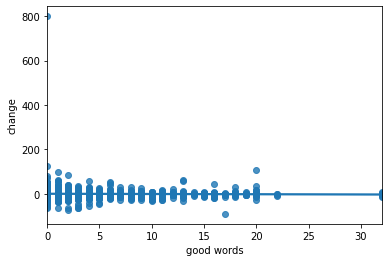

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("dataNew2.csv")
df['change'] = df['change'].str.extract(r'(([+-]?([0-9]*[.])?[0-9]+))').astype(float).replace(np.nan, 0.0)
sns.regplot(x='good words', y='change', data=df);
plt.savefig('SentimentRegression.pdf')
    #plt.clf()
    #plt.figure()
    #sns.regplot(x='num_comments', y='change', data=posts);
    #plt.savefig('CommentsRegression.pdf')
    #plt.clf()
    #plt.figure()
    #sns.regplot(x='score', y='num_comments', data=posts);
    #plt.savefig('CommentsVsUpvotes.pdf')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


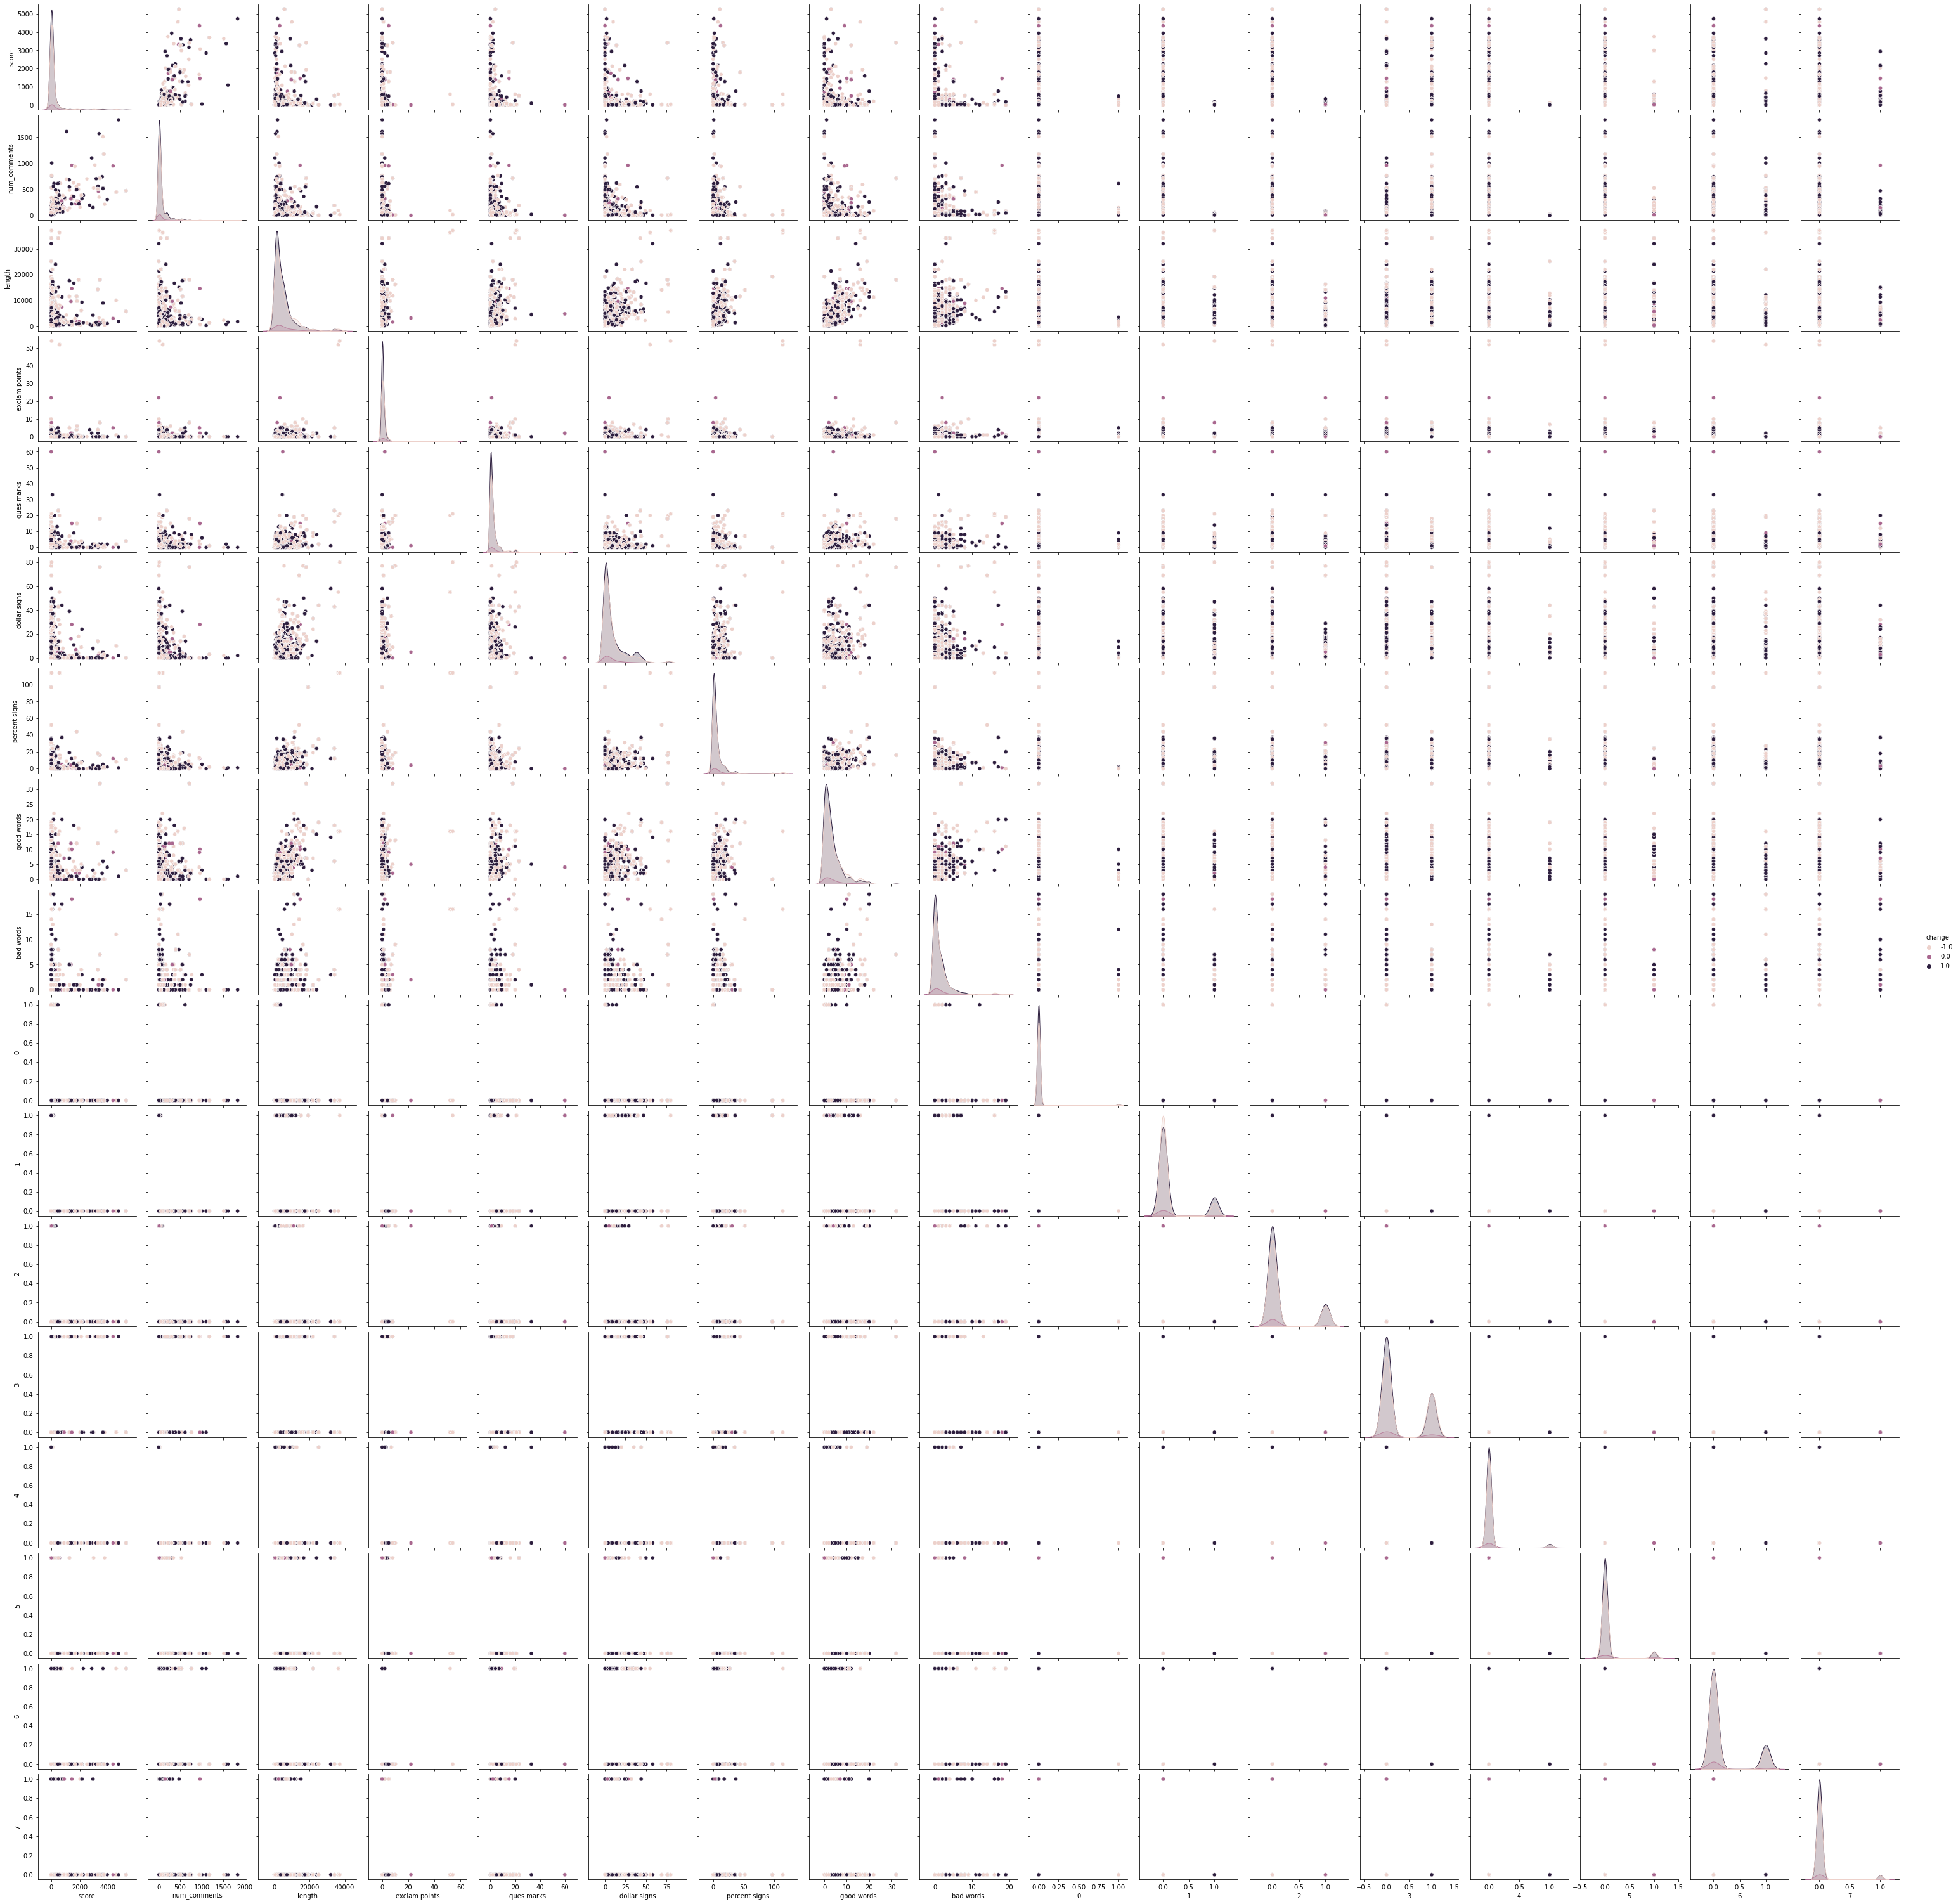

In [25]:
df = pd.read_csv("dataNew2.csv")
df['change'] = df['change'].str.extract(r'(([+-]?([0-9]*[.])?[0-9]+))').astype(float).replace(np.nan, 0.0)
df['change'] = np.sign(df['change'])
df = df.drop(["created",'ticker'], axis = 1)

#OHE
onehot_features = ['subreddit']
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False)
encoded = onehot.fit_transform(df[onehot_features])
encoded = pd.DataFrame(encoded)
df.drop(onehot_features, axis=1, inplace=True)
df = pd.concat([df, encoded], axis=1)

sns.pairplot(data = df, hue = 'change')
plt.savefig('ClassificationPairplots.pdf')